# analysis

> Looking at outliers in terms of num_strokes, num_points.

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
import os

import numpy as np

from singleline_dataset.dataset import *
from singleline_dataset.display import *
from singleline_dataset.fileorg import *
from singleline_dataset.strokes import *
from singleline_dataset.svg import *
from singleline_dataset.transforms import *

## Full Runs

### Dataset V1

- `epsilon=1.0`
- No max stroke threshold

In [ ]:
## first dataset

# full_dataset = svgs_to_deltas('../../svg-dataset/sketch_mgmt/imgs_sorted/drawings_svg_cropped/', '../outputs', limit=None)
# np.savez('../datasets/v1-splice.npz', full_dataset, encoding='latin1', allow_pickle=True)

## Dataset V2

- `epsilon=0.5`
- `max_stroke={5,6}`

In [ ]:
# ## second dataset

# %%time

# full_dataset_eps05 = svgs_to_deltas(
#     "../../svg-dataset/sketch_mgmt/imgs_sorted/drawings_svg_cropped/",
#     "../outputs_segmented",
#     epsilon=0.5,
#     limit=None,
# )

# print("-" * 50)
# print(len(full_dataset_eps05))
# print("-" * 50)
# np.savez(
#     "../datasets/v2-splice-eps05-j15-s40.npz",
#     full_dataset_eps05,
#     encoding="latin1",
#     allow_pickle=True,
# )

Dataset V3

In [ ]:
# full_dataset = svgs_to_deltas(
#     singleline_data_home() / "svg/epoch-20231214/0_drawings",
#     singleline_data_home() / "stroke3/epoch-20231214/0_drawings",
#     epsilon=1.0,
#     limit=None,
# )

# np.savez(
#     singleline_data_home() / "stroke3/epoch-20231214//full-v2-eps10.npz",
#     full_dataset,
#     encoding="latin1",
#     allow_pickle=True,
# )

In [ ]:
data_home = singleline_data_home(default="../data_home")

sample_path = data_home / "stroke3/epoch-20231214/sample-v2-eps10.npz"

no env var SINGLELINE_DATA_HOME, defaulting to: None


Analysis: choosing max stroke threshold, to filter out drawings with too much complexity.

In [ ]:
full_dataset = np.load(
    sample_path,
    encoding="latin1",
    allow_pickle=True,
)["arr_0"]
len(full_dataset)

df = stroke_summary_df(full_dataset)
df.head()

,idx,num_points,num_strokes
0,0,246,5
1,1,172,4
2,2,306,4
3,3,213,3
4,4,35,4


<Axes: >

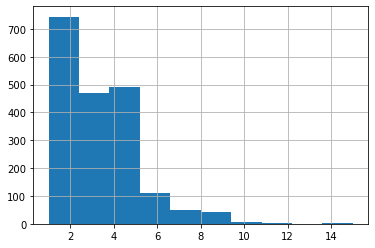

In [ ]:
df.num_strokes.hist()

**TODO:**
- map order of TSV/DF to order of dataset (or of full dataset file)

In [ ]:
plot_strokes(deltas_to_strokes(full_dataset[0]))

In [ ]:
s0 = deltas_to_strokes(full_dataset[0])

## Chop Dataset into Train/Val

In [ ]:
# d6 = df[df.num_strokes <= 6].sample(frac=1)
# train_size = int(len(d6) * 0.8 / 100) * 100
# val_size = len(d6) - train_size
# print(train_size, val_size, len(d6))

# d6_train = full_dataset[list(d6[:train_size].idx)]
# d6_val = full_dataset[list(d6[train_size:].idx)]
# print(len(d6_train), len(d6_val))

# np.savez(
#     "v2-splice-maxstrokes6.npz",
#     train=d6_train,
#     valid=d6_val,
#     test=d6_val,
#     encoding="latin1",
#     allow_pickle=True,
# )

1200 347 1547
1200 347


(1200, 347)

<Axes: >

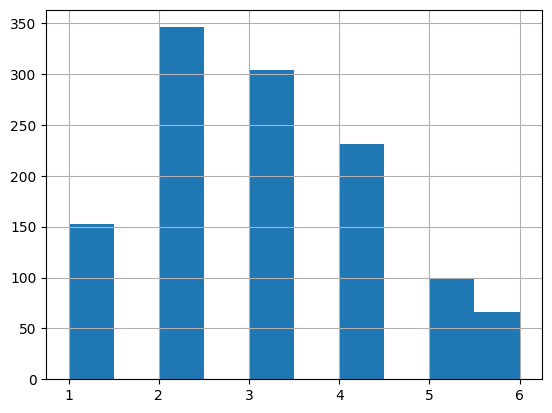

In [ ]:
# import pandas as pd

# d6_summary = [
#     {"idx": i, "num_points": len(deltas), "num_strokes": len(deltas_to_strokes(deltas))}
#     for i, deltas in enumerate(d6_train)
# ]
# d6df = pd.DataFrame(d6_summary)
# d6df.num_strokes.hist()

In [ ]:
# d5 = df[df.num_strokes <= 5].sample(frac=1)
# train_size = int(len(d5) * 0.8 / 100) * 100
# val_size = len(d5) - train_size
# print(train_size, val_size, len(d5))

# d5_train = full_dataset[list(d5[:1200].idx)]
# d5_val = full_dataset[list(d5[1200:].idx)]
# print(len(d5_train), len(d5_val))

# np.savez(
#     "v2-splice-maxstrokes5.npz",
#     train=d5_train,
#     valid=d5_val,
#     test=d5_val,
#     encoding="latin1",
#     allow_pickle=True,
# )

1100 362 1462
1200 262


## Inspect edge cases

<Axes: >

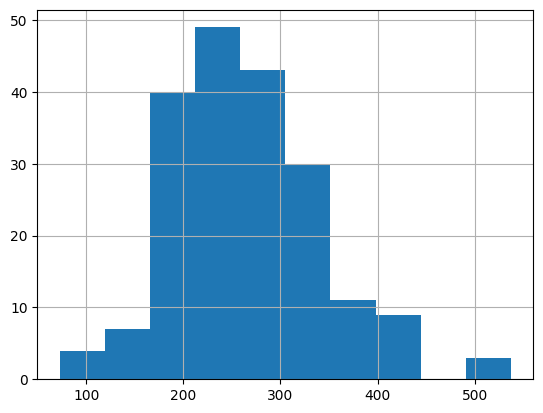

In [ ]:
# df[df.num_strokes <= 2].num_points.hist()

In [ ]:
# df[df.num_strokes <= 2].iloc[:5]

,idx,num_points,num_strokes
1455,0,177,2
1456,5,252,2
1457,12,236,2
1458,28,387,2
1459,35,303,2


In [ ]:
# df[df.num_strokes <= 2].iloc[:5]

In [ ]:
# tmp1 = [s for s in deltas_to_strokes(tmp) if len(s) > 0]

# strokes_to_deltas(rdp_strokes(tmp1, epsilon=1.1)).shape

In [ ]:
# plot_strokes(rdp_strokes(tmp1, epsilon=1.1))

In [ ]:
# import numpy as np

# max_seq_len = 20
# overflow = len(tmp) - max_seq_len
# rand_offset = int(np.random.rand() * overflow)
# overflow, rand_offset
# rand_offset = 0
# plot_strokes(deltas_to_strokes(tmp[rand_offset : rand_offset + max_seq_len]))

In [ ]:
# df[df.num_strokes < 5].sample(frac=1).num_strokes.hist()

In [ ]:
# len(df[df.num_strokes == 6])

In [ ]:
# for i in range(5):
#     row = df[df.num_strokes == 6].iloc[i]
#     print(row)
#     plot_strokes(deltas_to_strokes(full_dataset[row.idx]))

In [ ]:
# for entry in by_num_strokes[10:20]:
#     idx, num_points, num_strokes = entry
#     plot_strokes(deltas_to_strokes(full_dataset[idx]))

## Find shortest strokes

In [ ]:
# len(df[df.num_strokes == 4])

In [ ]:
# for idx in range(len(df[df.num_strokes <= 4])):
#     print(idx)

In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()